# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path, quotechar= '"')
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_study_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_mouse_study_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [143]:
# Checking the number of mice.
mouse_total = combined_mouse_study_data["Mouse ID"].nunique()
mouse_total

249

In [144]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_mouse_study_data[combined_mouse_study_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [145]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mouse_study_data = combined_mouse_study_data[combined_mouse_study_data['Mouse ID'] != 'g989']
combined_mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [146]:
# Checking the number of mice in the clean DataFrame.
mouse_total_clean = combined_mouse_study_data["Mouse ID"].nunique()
mouse_total_clean

248

## Summary Statistics

In [147]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mouse_summary_stats = combined_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean='mean', median='median', variance='var', std_dev='std', sem='sem')
mouse_summary_stats.rename(columns={'mean': 'Mean Tumor Volume','median': 'Median Tumor Volume','variance': 'Tumor Volume Variance','std_dev': 'Tumor Volume Std. Dev.','sem': 'Tumor Volume Std. Err'}, inplace=True)
mouse_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [148]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_summary_stats = combined_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_Std_Err='sem'
)

mouse_summary_stats

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

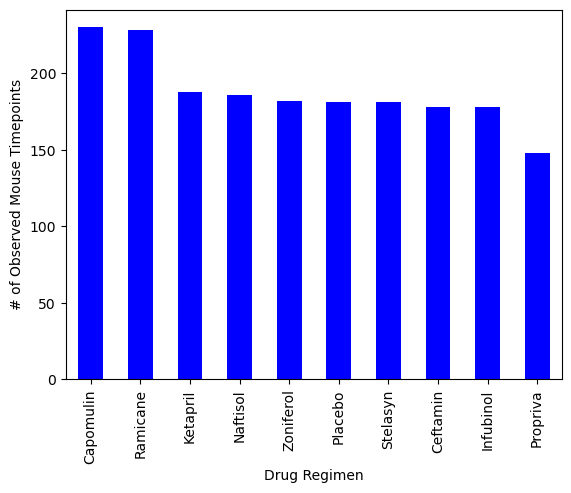

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_bar_chart = combined_mouse_study_data.groupby('Drug Regimen').size()
mouse_bar_chart_sort.plot(kind='bar', color = 'blue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

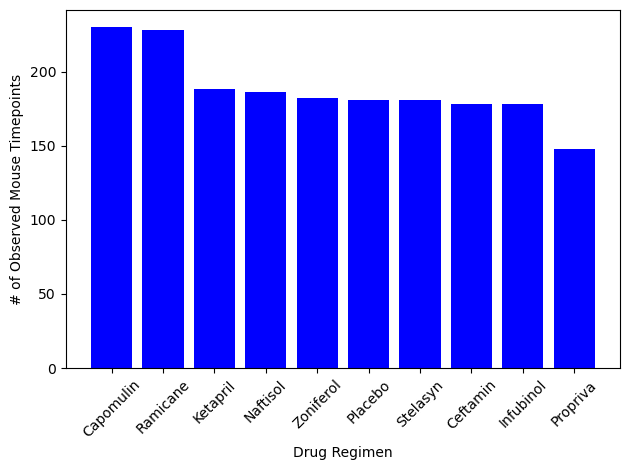

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_bar_chart = combined_mouse_study_data.groupby('Drug Regimen').size()
plt.bar(mouse_bar_chart_sort.index, mouse_bar_chart_sort.values, color='blue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [151]:
combined_mouse_study_data.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

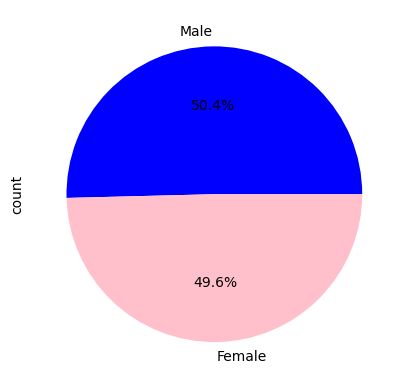

In [152]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
mouse_gender = combined_mouse_study_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]
# Get the unique mice with their gender
mouse_gender_count = mouse_gender['Sex'].value_counts()

# Make the pie chart
mouse_gender_count.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'], startangle=0)

plt.show()

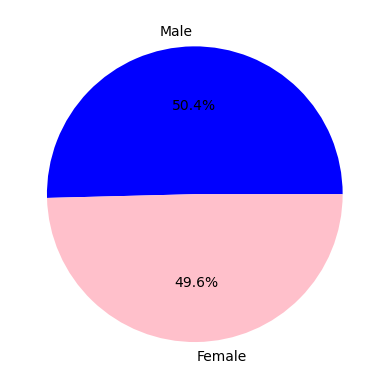

In [153]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
mouse_gender = combined_mouse_study_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]
# Get the unique mice with their gender
mouse_gender_count = mouse_gender['Sex'].value_counts()

# Make the pie chart
plt.pie(mouse_gender_count, labels=mouse_gender_count.index, autopct='%1.1f%%', colors=['blue', 'pink'], startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [154]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
subset_regimens = combined_mouse_study_data[combined_mouse_study_data['Drug Regimen'].isin(treatment_regimens)]


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = subset_regimens.groupby('Mouse ID')['Timepoint'].max()
final_tumor_volume_df = pd.merge(last_timepoint_df, combined_mouse_study_data, on=['Mouse ID', 'Timepoint'])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volume_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [155]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for treatment in treatment_regimens:
    treatment_regimens_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]
    tumor_vol_list.append(treatment_regimens_data['Tumor Volume (mm3)'])
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    Q1 = treatment_regimens_data['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = treatment_regimens_data['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR    
 
    # Determine outliers using upper and lower bounds
    outliers = treatment_regimens_data[(treatment_regimens_data['Tumor Volume (mm3)'] < lower_bound) | 
                                       (treatment_regimens_data['Tumor Volume (mm3)'] > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers['Tumor Volume (mm3)']}")
    print('---------------------------------------')                                  

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
---------------------------------------
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------


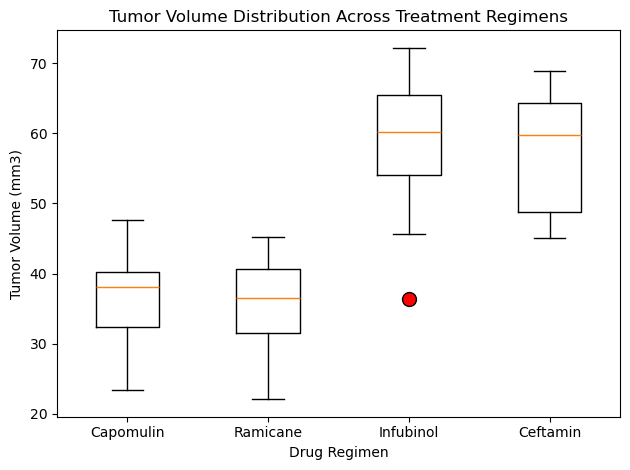

In [156]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data for each treatment group
tumor_vol_list = []

# Loop through each treatment regimen and append the tumor volumes to the list
for treatment in treatment_regimens:
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]
    tumor_vol_list.append(treatment_data['Tumor Volume (mm3)'])

outlier_marker = dict(markerfacecolor='red', markersize=10)

# Use plt.boxplot() to create the box plot
plt.boxplot(tumor_vol_list,flierprops=outlier_marker)

# Set the x-axis labels to the treatment names
plt.xticks(range(1, len(treatment_regimens) + 1), treatment_regimens)

# Set plot labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Distribution Across Treatment Regimens")

# Show the plot
plt.tight_layout()
plt.show()

## Line and Scatter Plots

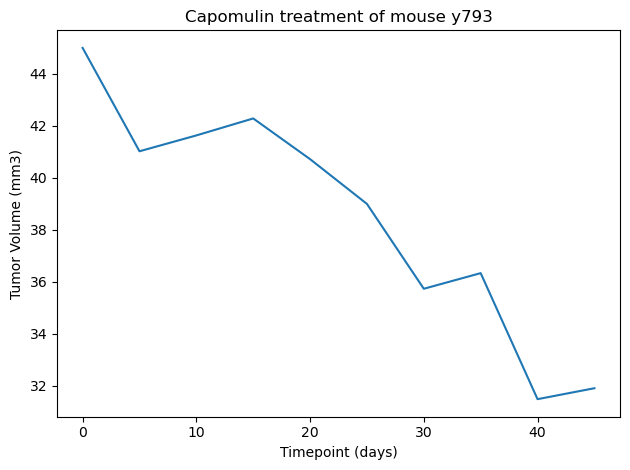

In [157]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "y793"
capomulin_data = combined_mouse_study_data[(combined_mouse_study_data['Drug Regimen'] == 'Capomulin') & (combined_mouse_study_data['Mouse ID'] == mouse_id)]

timepoints = capomulin_data['Timepoint']
tumor_volumes = capomulin_data['Tumor Volume (mm3)']

plt.plot(timepoints, tumor_volumes)

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse y793")

plt.tight_layout()
plt.show()

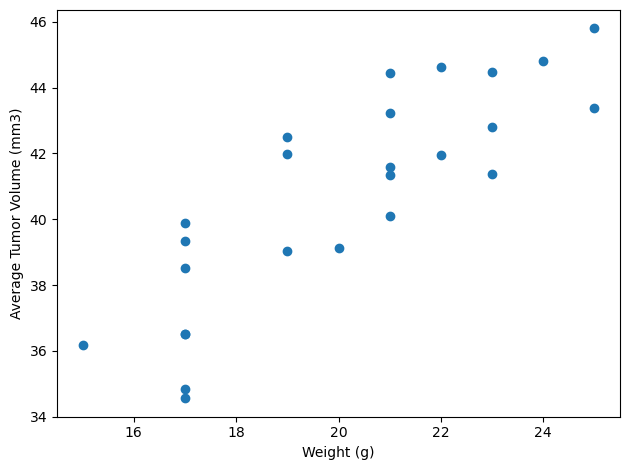

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_mouse_study_data[combined_mouse_study_data['Drug Regimen'] == 'Capomulin']
capomulin_grouped = capomulin_data.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

## Correlation and Regression

Correlation Coefficient between Mouse Weight and Average Tumor Volume: 0.84


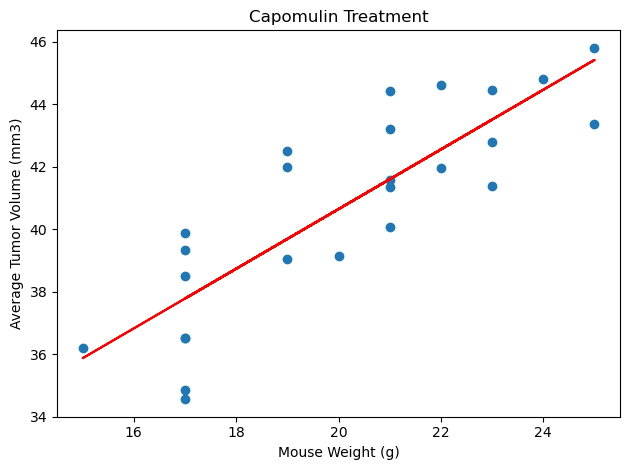

In [186]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_mouse_study_data[combined_mouse_study_data['Drug Regimen'] == 'Capomulin']
capomulin_grouped = capomulin_data.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()


correlation = capomulin_grouped['Weight (g)'].corr(capomulin_grouped['Tumor Volume (mm3)'])
print(f"Correlation Coefficient between Mouse Weight and Average Tumor Volume: {correlation:.2f}")

corr=round(st.pearsonr(capomulin_grouped['Weight (g)'],capomulin_grouped['Tumor Volume (mm3)'])[0],2)
model = st.linregress(capomulin_grouped['Weight (g)'],capomulin_grouped['Tumor Volume (mm3)'])

y_values = capomulin_grouped['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_grouped['Weight (g)'],capomulin_grouped['Tumor Volume (mm3)'])
plt.plot(capomulin_grouped['Weight (g)'],y_values,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Treatment")
plt.tight_layout()
plt.show()


Correlation Coefficient between Mouse Weight and Average Tumor Volume: 0.81


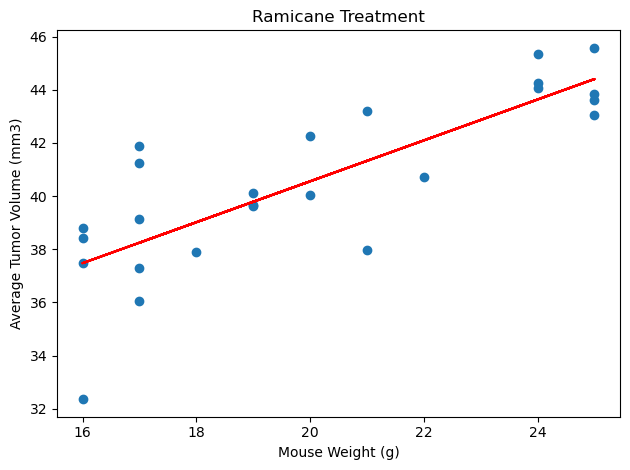

In [187]:
ramicane_data = combined_mouse_study_data[combined_mouse_study_data['Drug Regimen'] == 'Ramicane']
ramicane_grouped = ramicane_data.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

correlation = ramicane_grouped['Weight (g)'].corr(ramicane_grouped['Tumor Volume (mm3)'])
print(f"Correlation Coefficient between Mouse Weight and Average Tumor Volume: {correlation:.2f}")


corr=round(st.pearsonr(ramicane_grouped['Weight (g)'],ramicane_grouped['Tumor Volume (mm3)'])[0],2)

model = st.linregress(ramicane_grouped['Weight (g)'],ramicane_grouped['Tumor Volume (mm3)'])

y_values = ramicane_grouped['Weight (g)']*model[0]+model[1]
plt.scatter(ramicane_grouped['Weight (g)'],ramicane_grouped['Tumor Volume (mm3)'])
plt.plot(ramicane_grouped['Weight (g)'],y_values,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Ramicane Treatment")
plt.tight_layout()
plt.show()

Correlation Coefficient between Mouse Weight and Average Tumor Volume: -0.06


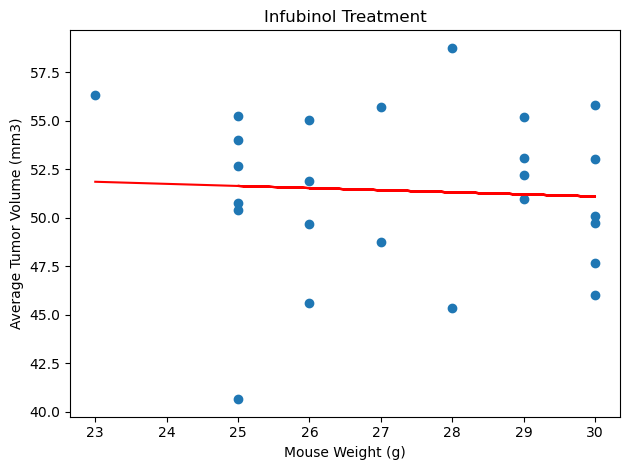

In [188]:
infubinol_data = combined_mouse_study_data[combined_mouse_study_data['Drug Regimen'] == 'Infubinol']
infubinol_grouped = infubinol_data.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

correlation = infubinol_grouped['Weight (g)'].corr(infubinol_grouped['Tumor Volume (mm3)'])
print(f"Correlation Coefficient between Mouse Weight and Average Tumor Volume: {correlation:.2f}")


corr=round(st.pearsonr(infubinol_grouped['Weight (g)'],infubinol_grouped['Tumor Volume (mm3)'])[0],2)

model = st.linregress(infubinol_grouped['Weight (g)'],infubinol_grouped['Tumor Volume (mm3)'])

y_values = infubinol_grouped['Weight (g)']*model[0]+model[1]
plt.scatter(infubinol_grouped['Weight (g)'],infubinol_grouped['Tumor Volume (mm3)'])
plt.plot(infubinol_grouped['Weight (g)'],y_values,color="red")

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Infubinol Treatment")
plt.tight_layout()
plt.show()

Correlation Coefficient between Mouse Weight and Average Tumor Volume: -0.04


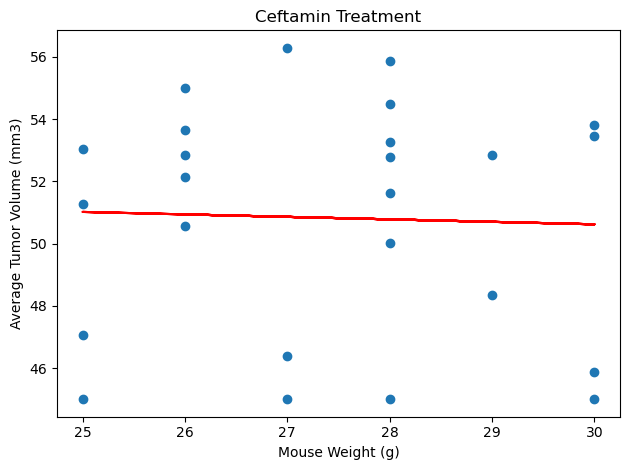

In [189]:
ceftamin_data = combined_mouse_study_data[combined_mouse_study_data['Drug Regimen'] == 'Ceftamin']
ceftamin_grouped = ceftamin_data.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

correlation = ceftamin_grouped['Weight (g)'].corr(ceftamin_grouped['Tumor Volume (mm3)'])
print(f"Correlation Coefficient between Mouse Weight and Average Tumor Volume: {correlation:.2f}")


corr=round(st.pearsonr(ceftamin_grouped['Weight (g)'],ceftamin_grouped['Tumor Volume (mm3)'])[0],2)

model = st.linregress(ceftamin_grouped['Weight (g)'],ceftamin_grouped['Tumor Volume (mm3)'])

y_values = ceftamin_grouped['Weight (g)']*model[0]+model[1]
plt.scatter(ceftamin_grouped['Weight (g)'],ceftamin_grouped['Tumor Volume (mm3)'])
plt.plot(ceftamin_grouped['Weight (g)'],y_values,color="red")

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Ceftamin Treatment")
plt.tight_layout()
plt.show()